<br>

## **__# *Apprentissage supervisé : Feature engineering et Classification*__**
   * L’objectif dans cette partie est de construire un bon classifieur sur un jeu de données de crédit scoring du fichier `"credit_scoring.csv"`.  

In [2]:
#- Référance :
     # https://www.youtube.com/watch?v=SrZ6vifbmdc
     # https://blent.ai/blog/a/apprentissage-supervise-definition
     # https://www.youtube.com/watch?v=Ps0y6w4cD_U


import numpy as np 
np.set_printoptions(threshold=np.inf) 
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

<br>
<br>

__- 1.1 Importer ce jeu de données avec la librairie pandas (c.f. read_csv)__

In [3]:

df = pd.read_csv("credit_scoring.csv", sep=";")
print(df.head(10))


   Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
0        9.0   1.0  60.0  30.0      0.0      1.0  1.0      73.0   129.0   
1       17.0   1.0  60.0  58.0      1.0      1.0  0.0      48.0   131.0   
2       10.0   0.0  36.0  46.0      0.0      2.0  1.0      90.0   200.0   
3        0.0   1.0  60.0  24.0      1.0      1.0  0.0      63.0   182.0   
4        0.0   1.0  36.0  26.0      1.0      1.0  0.0      46.0   107.0   
5        1.0   0.0  60.0  36.0      0.0      1.0  0.0      75.0   214.0   
6       29.0   0.0  60.0  44.0      0.0      1.0  0.0      75.0   125.0   
7        9.0   1.0  12.0  27.0      1.0      1.0  0.0      35.0    80.0   
8        0.0   0.0  60.0  32.0      0.0      1.0  1.0      90.0   107.0   
9        0.0   1.0  48.0  41.0      0.0      1.0  1.0      90.0    80.0   

    Assets  Debt  Amount   Price  Status  
0      0.0   0.0   800.0   846.0       1  
1      0.0   0.0  1000.0  1658.0       1  
2   3000.0   0.0  2000.0  2985.0       0  
3 

<br>
<br>

__- 1.2  Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array  
(c.f. values) et séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux tableaux différents.__

In [4]:
data = df.values # ou to_numpy()
print(data)

[[9.000e+00 1.000e+00 6.000e+01 ... 8.000e+02 8.460e+02 1.000e+00]
 [1.700e+01 1.000e+00 6.000e+01 ... 1.000e+03 1.658e+03 1.000e+00]
 [1.000e+01 0.000e+00 3.600e+01 ... 2.000e+03 2.985e+03 0.000e+00]
 ...
 [0.000e+00 0.000e+00 2.400e+01 ... 5.000e+02 9.630e+02 0.000e+00]
 [0.000e+00 1.000e+00 4.800e+01 ... 5.500e+02 5.500e+02 1.000e+00]
 [5.000e+00 0.000e+00 6.000e+01 ... 1.350e+03 1.650e+03 1.000e+00]]


In [5]:

x = df.drop(columns=['Status'])
y = df['Status']

print("\nCaractéristiques (x) :")
print(x)


Caractéristiques (x) :
      Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
0           9.0   1.0  60.0  30.0      0.0      1.0  1.0      73.0   129.0   
1          17.0   1.0  60.0  58.0      1.0      1.0  0.0      48.0   131.0   
2          10.0   0.0  36.0  46.0      0.0      2.0  1.0      90.0   200.0   
3           0.0   1.0  60.0  24.0      1.0      1.0  0.0      63.0   182.0   
4           0.0   1.0  36.0  26.0      1.0      1.0  0.0      46.0   107.0   
...         ...   ...   ...   ...      ...      ...  ...       ...     ...   
4370        1.0   1.0  60.0  39.0      0.0      1.0  0.0      69.0    92.0   
4371       22.0   0.0  60.0  46.0      0.0      1.0  0.0      60.0    75.0   
4372        0.0   0.0  24.0  37.0      0.0      1.0  1.0      60.0    90.0   
4373        0.0   1.0  48.0  23.0      1.0      1.0  1.0      49.0   140.0   
4374        5.0   0.0  60.0  32.0      0.0      1.0  1.0      60.0   140.0   

      Assets    Debt  Amount   Price  


In [6]:
print("\nVariable cible (y) :")
print(y)


Variable cible (y) :
0       1
1       1
2       0
3       1
4       1
       ..
4370    0
4371    1
4372    0
4373    1
4374    1
Name: Status, Length: 4375, dtype: int64


<br>
<br>

__- 1.3 Analyser les propriétés de vos données : taille de l’échantillon (c.f. shape), nombre d’exemples positifs et négatifs (c.f. hist).__


In [7]:
tailleEchan = df.shape # Affichage de la taille de l'échantillon
print("\nTaille de l’échantillon (lignes, colonnes) :")
print(tailleEchan)


Taille de l’échantillon (lignes, colonnes) :
(4375, 14)



Nombre d’exemples positifs et négatifs :
Status
1    3159
0    1216
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


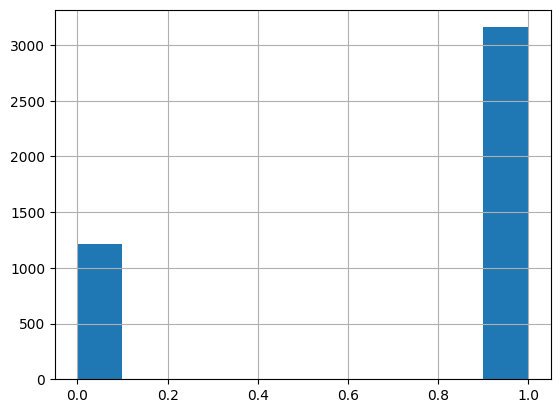

In [8]:
positfNegat = df['Status'].hist() # Affichage de l'histogramme
posneg = df['Status'].value_counts() # Affichage du nombre d'exemples positifs et négatifs
print("\nNombre d’exemples positifs et négatifs :")
print(posneg)
print(positfNegat)


<br>
<br>

__- 1.4) Pour éviter d’avoir un résultat biaisé du classifieur que nous allons construire, séparer les données en deux partie  
 une dite d’apprentissage qui servira à l’apprentissage du classifieur et l’autre dite de test qui servira à son évaluation (c.f train_test_split).__  


In [9]:
import sklearn
print(sklearn.__version__)


1.7.2


In [10]:
# Référance : 
       # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
       # https://www.youtube.com/watch?v=dSCFk168vmo
       # https://www.youtube.com/watch?v=NQifPki6tGE


from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.33, random_state=42)

print("\nDonnées d’apprentissage (x_train) :")
print(x_train)
print("\nDonnées de test (x_test) :")
print(x_test)



Données d’apprentissage (x_train) :
      Seniority  Home  Time   Age  Marital  Records  Job  Expenses  Income  \
3918        2.0   1.0  60.0  20.0      1.0      1.0  0.0      35.0    56.0   
1859        2.0   1.0  60.0  45.0      0.0      1.0  1.0      88.0   129.0   
3200        1.0   1.0  60.0  23.0      1.0      1.0  0.0      35.0   100.0   
31         14.0   1.0  24.0  51.0      0.0      1.0  1.0      75.0   198.0   
3344        4.0   1.0  60.0  38.0      0.0      1.0  0.0      79.0   188.0   
...         ...   ...   ...   ...      ...      ...  ...       ...     ...   
3444        2.0   1.0  60.0  43.0      0.0      2.0  1.0      84.0    86.0   
466         7.0   0.0  60.0  26.0      0.0      1.0  0.0      60.0   116.0   
3092        2.0   0.0  48.0  57.0      0.0      2.0  0.0      45.0   200.0   
3772        2.0   1.0  60.0  24.0      1.0      1.0  0.0      35.0   164.0   
860        12.0   1.0  36.0  52.0      0.0      1.0  1.0      75.0     0.0   

       Assets    Debt  Amo

In [11]:
print("\nVariable cible d’apprentissage (y_train) :")
print(y_train)
print("\nVariable cible de test (y_test) :")
print(y_test)


Variable cible d’apprentissage (y_train) :
3918    0
1859    1
3200    0
31      1
3344    0
       ..
3444    0
466     1
3092    1
3772    1
860     1
Name: Status, Length: 2931, dtype: int64

Variable cible de test (y_test) :
3011    1
463     0
2580    1
1017    1
3805    1
       ..
2640    1
883     0
1091    1
382     1
1675    1
Name: Status, Length: 1444, dtype: int64



<br>
<br>


### __2. *Apprentissage  et  évaluation  de  modèles  :  Utiliser  ensuite  sur  votre  jeu  de  données  les  algorithmes d’apprentissage supervisé suivants* :__

    • Un arbre CART (cart algorithm decision trees)
    • k-plus-proches-voisins avec k=5


__L’objectif est à présent de comparer les résultats obtenus à l’aide de ces deux simples algorithmes sur ce jeu de données.  
Cette comparaison s’appuiera sur l’estimation de l’accuracy.__



<br>

__- Un arbre CART (cart algorithm decision trees)__

In [21]:

# Référance : 
      # https://www.youtube.com/watch?v=zs6yHVtxyv8
      # https://www.youtube.com/watch?v=WaIK3UjYWs0
      # https://www.youtube.com/watch?v=2oiM3r-ciNg
      # https://www.thepingouin.com/2024/10/15/implementation-dun-arbre-de-decision-cart-en-python-guide-complet-pour-debutants/
      # https://medium.com/@kamilmatejuk/decision-trees-explained-f7cd940e23a5
      # https://www.youtube.com/watch?v=JcI5E2Ng6r4
      # https://www.youtube.com/watch?v=_L39rN6gz7Y




from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Initialisation du classifieur
model = DecisionTreeClassifier()
# Apprentissage
model.fit(x_train, y_train)
# Prédiction
y_pred = model.predict(x_test)


# Evolution des performances
print("\nAccuracy :")
print(accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))





Accuracy :
0.7222991689750693

Matrice de confusion :
[[194 203]
 [198 849]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       397
           1       0.81      0.81      0.81      1047

    accuracy                           0.72      1444
   macro avg       0.65      0.65      0.65      1444
weighted avg       0.72      0.72      0.72      1444



<br>
<br>

__- k-plus-proches-voisins avec k=5__

In [20]:
# Référance : 
     # https://www.youtube.com/watch?v=-TA7orMJuJ4
     # https://www.youtube.com/watch?v=hlHn7ZH8j8E
     # https://www.youtube.com/watch?v=jw5LhTWUoG4
     # https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4
     # https://www.youtube.com/watch?v=LOj9yGrgU4Y
     # https://info.blaisepascal.fr/nsi-les-k-plus-proches-voisins/


import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


# Initialisation du classifieur
knn = KNeighborsClassifier(n_neighbors=5)
# Apprentissage
knn.fit(x_train, y_train)
# Prédiction
y_pred = knn.predict(x_test)


# Evaluation des performances
print("\nAccuracy :")
print(accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))




Accuracy :
0.7202216066481995

Matrice de confusion :
[[124 273]
 [131 916]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.49      0.31      0.38       397
           1       0.77      0.87      0.82      1047

    accuracy                           0.72      1444
   macro avg       0.63      0.59      0.60      1444
weighted avg       0.69      0.72      0.70      1444



<br>
<br>

### __3. *Normalisation des  variables  continues  :*__ 

* Certains  algorithmes  d’apprentissage  supervisé  fonctionneront mieux si les données sont normalisées (`centrées autour de 0`) pour que toutes les variables caractéristiques auront  le  même  poids  dans  la  phase  d’apprentissage.  
Utiliser  `le  module StandardScaler  de  Scikit-learn pour  normaliser  vos  données`. Vous  pouvez  également  tester  `le  module  MinMaxScaler`. Exécuter  à nouveau  votre  code  sur  vos  données  une  fois  normalisées.
Interpréter  les  résultats  obtenus  en les comparant avec ceux de la question précédente.

<br>

__En Python (avec scikit-learn), il existe plusieurs méthodes pour mettre à l’échelle les variables continues :__

- **`MinMaxScaler`** : effectue une mise à l’échelle dans un intervalle donné (ex. `[0, 1]`).
- **`StandardScaler`** : effectue une **standardisation** (`centrage et réduction : moyenne = 0, écart-type = 1`),  
aussi appelée *normalisation Z-score* dans certains contextes statistiques.

<br>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Fonction de arbre de décision CART
def train_arbre_decision_cart(x_train,y_train):
    model_dtc = DecisionTreeClassifier()
    model_dtc.fit(x_train,y_train)
    return model_dtc


# Test de arbre de décision CART
def test_arbre_decision_cart(x_test,y_test,model_dtc):
    prediction_dtc = model_dtc.predict(x_test)

    acc_dtc = accuracy_score(y_test,prediction_dtc)
    matrice_confusion_dtc = confusion_matrix(y_test,prediction_dtc)
    rapport_classification_dtc = classification_report(y_test,prediction_dtc)

    print(f"\n- Score accuracy de l'arbre CART :", acc_dtc)
    print(f"- Matrice de confusion de l'arbre CART :\n",matrice_confusion_dtc)
    print(f"- Rapport de classification de l'arbre CART :\n", rapport_classification_dtc)



# Fonction de k-plus-proches-voisins
def train_k_plus_proches(x_train,y_train):
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(x_train,y_train)
    return model_knn


# Test de k-plus-proches-voisins
def test_k_plus_proches(x_test,y_test,model_knn):
    prediction_knn = model_knn.predict(x_test)

    acc_knn = accuracy_score(y_test,prediction_knn)
    matrice_confusion_knn = confusion_matrix(y_test,prediction_knn)
    rapport_classification_knn = classification_report(y_test,prediction_knn)

    print(f"\n- Score accuracy de k-plus-proches-voisins :", acc_knn)
    print(f"- Matrice de confusion de k-plus-proches-voisins :\n", matrice_confusion_knn)
    print(f"- Rapport de classification de k-plus-proches-voisins :\n", rapport_classification_knn)



<br>
<br>


__# Sans normalisation__

In [15]:

print("\nDecision Tree sans normalisation :")
train_model_dtc = train_arbre_decision_cart(x_train, y_train)
test_arbre_decision_cart(x_test, y_test, train_model_dtc)


print("\n\n\nk-Plus Proches Voisins sans normalisation :")
train_model_knn = train_k_plus_proches(x_train, y_train)
test_k_plus_proches(x_test, y_test, train_model_knn)


Decision Tree sans normalisation :

- Score accuracy de l'arbre CART : 0.721606648199446
- Matrice de confusion de l'arbre CART :
 [[189 208]
 [194 853]]
- Rapport de classification de l'arbre CART :
               precision    recall  f1-score   support

           0       0.49      0.48      0.48       397
           1       0.80      0.81      0.81      1047

    accuracy                           0.72      1444
   macro avg       0.65      0.65      0.65      1444
weighted avg       0.72      0.72      0.72      1444




k-Plus Proches Voisins sans normalisation :

- Score accuracy de k-plus-proches-voisins : 0.7202216066481995
- Matrice de confusion de k-plus-proches-voisins :
 [[124 273]
 [131 916]]
- Rapport de classification de k-plus-proches-voisins :
               precision    recall  f1-score   support

           0       0.49      0.31      0.38       397
           1       0.77      0.87      0.82      1047

    accuracy                           0.72      1444
   macro 

<br>

* Sans normalisation, l’arbre de décision a `une accuracy de 0,722`. Il prédit bien la classe majoritaire  
 `(f1-score 0,81)` mais moins la minoritaire `(f1-score 0,48)`, montrant sa robustesse aux échelles.

* Le k-NN a une accuracy similaire `(0,720)` mais prédit mal la classe minoritaire `(f1-score 0,38)` et  
 bien la majoritaire `(f1-score 0,82)`, révélant sa sensibilité à l’absence de normalisation.

* *Conclusion : `Sans normalisation, l’arbre de décision est légèrement meilleur et plus stable que k-NN`,  
 car ce dernier souffre du déséquilibre des échelles des variables.*

<br>
<br>


__# Normalistion avec StandardScaler__

In [16]:
# Référance :
      # https://scikit-learn.org/stable/modules/preprocessing.html
      # https://inside-machinelearning.com/normaliser-donnees-2-minutes/
      # https://www.geeksforgeeks.org/machine-learning/what-is-data-normalization/
      # https://www.alliage-ad.com/tutoriels-python/les-methodes-de-normalisation/
      # https://www.youtube.com/watch?v=bqhQ2LWBheQ




# initialisation de Scaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

print("\n### Avec normalisation StandardScaler ###")
# Arbre de décision CART
model_dtc_scaler = train_arbre_decision_cart(x_train_scaler,y_train)
test_arbre_decision_cart(x_test_scaler,y_test,model_dtc_scaler)

# k-Plus Proches Voisins
model_knn_scaler = train_k_plus_proches(x_train_scaler,y_train)
test_k_plus_proches(x_test_scaler,y_test,model_knn_scaler)




### Avec normalisation StandardScaler ###

- Score accuracy de l'arbre CART : 0.7091412742382271
- Matrice de confusion de l'arbre CART :
 [[178 219]
 [201 846]]
- Rapport de classification de l'arbre CART :
               precision    recall  f1-score   support

           0       0.47      0.45      0.46       397
           1       0.79      0.81      0.80      1047

    accuracy                           0.71      1444
   macro avg       0.63      0.63      0.63      1444
weighted avg       0.71      0.71      0.71      1444


- Score accuracy de k-plus-proches-voisins : 0.7465373961218836
- Matrice de confusion de k-plus-proches-voisins :
 [[177 220]
 [146 901]]
- Rapport de classification de k-plus-proches-voisins :
               precision    recall  f1-score   support

           0       0.55      0.45      0.49       397
           1       0.80      0.86      0.83      1047

    accuracy                           0.75      1444
   macro avg       0.68      0.65      0.66     

<br>

* Avec StandardScaler, l’arbre de décision reste stable `(accuracy 0,709)`, prédominance pour la classe majoritaire  
 `(f1-score 0,80)` et faible détection de la minoritaire `(f1-score 0,46)`.

* Le k-NN s’améliore `(accuracy 0,747)`, meilleure reconnaissance de la minoritaire `(f1-score 0,49)` et bonne pour la majoritaire  
 `(f1-score 0,83)`.__

* *Conclusion : `k-NN bénéficie de la normalisation et dépasse l’arbre, qui reste stable`.*

<br>
<br>


__# Normalistion avec MinMaxScaler__

In [17]:
# Référance :
        # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
        # https://inside-machinelearning.com/normaliser-donnees-2-minutes/
        # https://www.geeksforgeeks.org/machine-learning/what-is-data-normalization/
        # https://www.alliage-ad.com/tutoriels-python/les-methodes-de-normalisation/
        # https://www.youtube.com/watch?v=bqhQ2LWBheQ



# initialisation de MinMaxScaler
scaler_minmax = MinMaxScaler()
x_train_minmax = scaler_minmax.fit_transform(x_train)
x_test_minmax = scaler_minmax.transform(x_test)

print("\n### Avec normalisation MinMaxScaler ###")
# Arbre de décision CART
model_dtc_minmax = train_arbre_decision_cart(x_train_minmax,y_train)
test_arbre_decision_cart(x_test_minmax,y_test,model_dtc_minmax)

# k-Plus Proches Voisins
model_knn_minmax = train_k_plus_proches(x_train_minmax,y_train)
test_k_plus_proches(x_test_minmax,y_test,model_knn_minmax)



### Avec normalisation MinMaxScaler ###

- Score accuracy de l'arbre CART : 0.711218836565097
- Matrice de confusion de l'arbre CART :
 [[183 214]
 [203 844]]
- Rapport de classification de l'arbre CART :
               precision    recall  f1-score   support

           0       0.47      0.46      0.47       397
           1       0.80      0.81      0.80      1047

    accuracy                           0.71      1444
   macro avg       0.64      0.63      0.63      1444
weighted avg       0.71      0.71      0.71      1444


- Score accuracy de k-plus-proches-voisins : 0.7423822714681441
- Matrice de confusion de k-plus-proches-voisins :
 [[171 226]
 [146 901]]
- Rapport de classification de k-plus-proches-voisins :
               precision    recall  f1-score   support

           0       0.54      0.43      0.48       397
           1       0.80      0.86      0.83      1047

    accuracy                           0.74      1444
   macro avg       0.67      0.65      0.65      14

<br>


* Avec MinMaxScaler, `l’arbre de décision reste stable (accuracy 0,711)`, prédominance pour la classe majoritaire  
 `(f1-score 0,80)` et faible détection de la minoritaire `(f1-score 0,47)`.

* `Le k-NN s’améliore (accuracy 0,742)`, meilleure reconnaissance de la minoritaire `(f1-score 0,48)` et bonne pour  
 la majoritaire `(f1-score 0,83)`.

* *Conclusion : `k-NN bénéficie de la normalisation et dépasse l’arbre, qui reste stable`.*

<br>
<br>

#### __# Intrprétation finale__

* La normalisation d’effet sur l’arbre de décision, dont `la performance reste stable autour de 71–72 %`, ce qui est logique puisqu’il ne dépend pas de l’échelle des variables. En revanche, k-NN gagne clairement en précision grâce à la normalisation, avec de meilleurs `résultats sous StandardScaler (74,7 %)` que sous `MinMaxScaler (74,2 %)`. Cela confirme que les algorithmes basés sur les distances nécessitent une mise à l’échelle des données, tandis que les arbres s’en passent très bien.